In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def create_simple_set(set_size = 50, division_point = 0.5, zero_class_left_prob = 0.95, zero_class_right_prob = 0.05):
    rng = np.random.default_rng()
    feature_vals = rng.random(set_size)
    class_labels = []

    for fval in feature_vals:
        if fval <= division_point:
            curr_zero_prob = zero_class_left_prob
        else:
            curr_zero_prob = zero_class_right_prob
        
        if rng.random() <= curr_zero_prob:
            class_labels.append(0)
        else:
            class_labels.append(1)

    return pd.DataFrame({'feature': feature_vals, 'label': class_labels})

        


In [66]:
def create_simple_diffusion_set(set_size = 50, diffusion_distance = 0.25):
    rng = np.random.default_rng()
    circles_fvals = rng.uniform(0, 0.5, size=int(set_size/2))
    crosses_fvals = rng.uniform(0.5, 1, size=int(set_size/2))
    final_circles_fvals = []
    final_crosses_fvals = []

    for circle_fval in circles_fvals:
        if 0.5 - circle_fval <= diffusion_distance:
            final_circles_fvals.append(circle_fval + rng.uniform(0, diffusion_distance))
        else:
            final_circles_fvals.append(circle_fval)

    for cross_fval in crosses_fvals:
        if cross_fval - 0.5 <= diffusion_distance:
            final_crosses_fvals.append(cross_fval - rng.uniform(0, diffusion_distance))
        else:
            final_crosses_fvals.append(cross_fval)

    return pd.DataFrame({'feature': final_circles_fvals + final_crosses_fvals, 
                         'label': list(np.repeat(0, len(final_circles_fvals))) + 
                                  list(np.repeat(1, len(final_crosses_fvals)))})


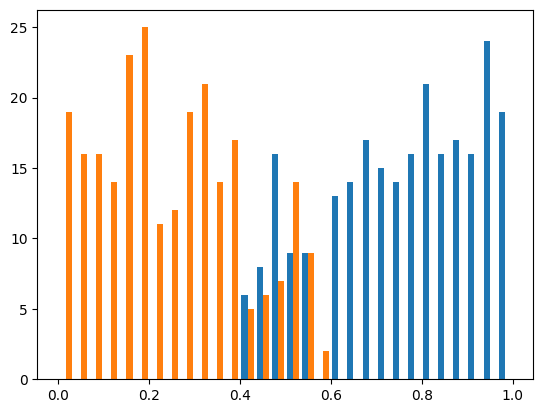

In [28]:
curr_set = create_simple_diffusion_set(500, diffusion_distance=0.1)
plt.hist([curr_set[curr_set.label == 1].feature, curr_set[curr_set.label == 0].feature], bins=30)
plt.show()

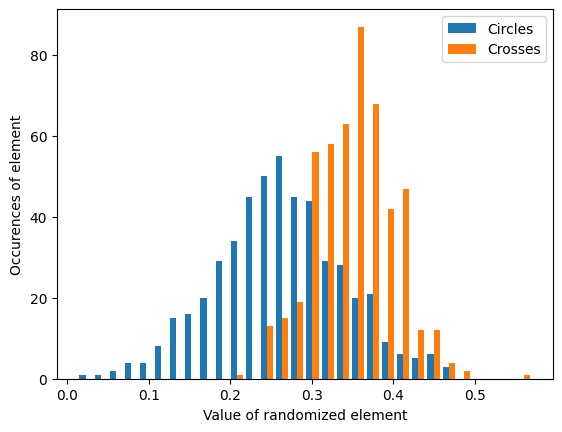

In [9]:
my_set = create_set_by_feature_dist(circle_loc=0.25, cross_loc=0.35, circle_scale=0.08, cross_scale=0.05, rand_seed=123456)

plt.hist([my_set[my_set.label == 0].feature, my_set[my_set.label == 1].feature], bins = 30, label=['Circles', 'Crosses'])
plt.xlabel('Value of randomized element')
plt.ylabel('Occurences of element')
plt.legend()
plt.show()

In [35]:
def create_simple_set_2(set_size = 50, division_point = 0.5, zero_class_left_prob = 0.95, zero_class_right_prob = 0.05):
    rng = np.random.default_rng()
    feature_vals = rng.random(set_size)
    class_labels = []

    for fval in feature_vals:
        if fval <= division_point:
            curr_zero_prob = zero_class_left_prob
        else:
            curr_zero_prob = zero_class_right_prob
        
        if rng.random() <= curr_zero_prob:
            class_labels.append(0)
        else:
            class_labels.append(1)

    return pd.DataFrame({'feature': feature_vals, 'label': class_labels})


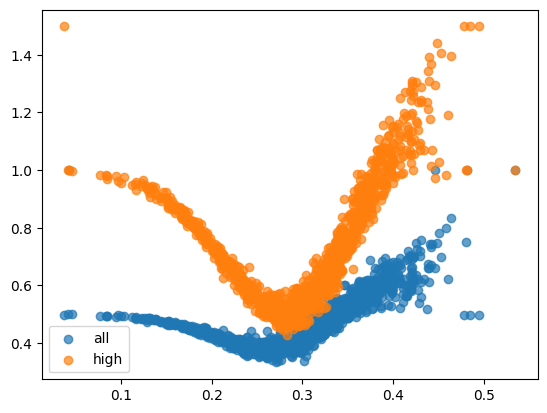

In [50]:
plt.scatter(feature_val, val_imp_metr_all, alpha=0.7, label='all')
plt.scatter(feature_val, val_imp_metr_high, alpha=0.7, label='high')
plt.legend()

In [20]:
simple_set_df = create_set_by_feature_dist(circle_count=30, cross_count=30, circle_loc=0.25, cross_loc=0.35, circle_scale=0.08, cross_scale=0.05)

In [4]:
def plot_impurty_metrics_(set_df: pd.DataFrame, feat_idx: int, use_weighting: bool = False):

    s_val_imp_metr_all = []
    s_val_imp_metr_high = []
    s_feature_val = []

    for fval in simple_set_df.feature:
        s_val_imp_metr_all.append(impurty_metrics_all_in_denominator(simple_set_df, feat_idx = 0, div_point = fval, use_weighting=True))
        s_val_imp_metr_high.append(impurty_metrics_higher_in_denominator(simple_set_df, feat_idx = 0, div_point = fval, use_weighting=True))
        s_feature_val.append(fval)

    s_y_min_value_all = min(s_val_imp_metr_all)
    s_y_min_value_high = min(s_val_imp_metr_high)

    s_index_y_val_all = s_val_imp_metr_all.index(min(s_val_imp_metr_all))
    s_index_y_val_high = s_val_imp_metr_high.index(min(s_val_imp_metr_high))

    s_x_min_value_all = s_feature_val[s_index_y_val_all]
    s_x_min_value_high = s_feature_val[s_index_y_val_high]

    print(s_x_min_value_all, s_x_min_value_high)

    plt.scatter(s_feature_val, s_val_imp_metr_all, alpha=0.7, label='all', marker='+')
    plt.scatter(s_feature_val, s_val_imp_metr_high, alpha=0.7, label='high', marker= 'o')
    plt.axvline(x=s_x_min_value_all, color='black', linestyle='dashed', label='min x for all in demominator metric')
    plt.axvline(x=s_x_min_value_high, color='black', linestyle='dotted', label='min x for high in demominator metric')
    plt.xlabel('Feature value')
    plt.ylabel('Value of impurity metric')
    plt.legend()


NameError: name 'pd' is not defined

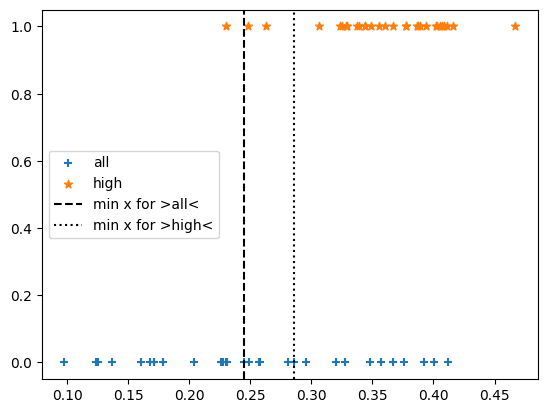

In [48]:
plt.scatter(x=simple_set_df[simple_set_df.label == 0].feature, y=simple_set_df[simple_set_df.label == 0].label, label='all', marker='+')
plt.scatter(x=simple_set_df[simple_set_df.label == 1].feature, y=simple_set_df[simple_set_df.label == 1].label, label='high', marker= '*')
plt.axvline(x=s_x_min_value_all, color='black', linestyle='dashed', label='min x for >all<')
plt.axvline(x=s_x_min_value_high, color='black', linestyle='dotted', label='min x for >high<')
plt.legend(loc="center left")

(array([[ 3.,  2.,  4.,  5.,  6.,  6.,  2.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  4., 10., 11.,  4.,  1.]]),
 array([0.06150634, 0.1039272 , 0.14634807, 0.18876893, 0.2311898 ,
        0.27361066, 0.31603153, 0.35845239, 0.40087326, 0.44329413,
        0.48571499]),
 <a list of 2 BarContainer objects>)

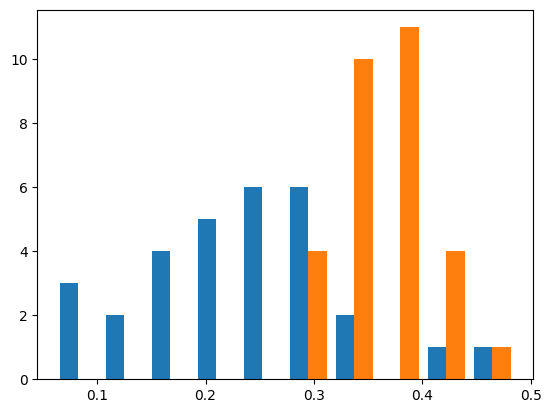

In [64]:
plt.hist([simple_set_df[simple_set_df.label == 0].feature, simple_set_df[simple_set_df.label == 1].feature])

In [42]:
# set_df = create_set_by_feature_dist(circle_count=30, cross_count=30, circle_loc=0.25, cross_loc=0.35, circle_scale=0.08, cross_scale=0.05, rand_seed=999)

In [2]:
def create_set_by_feature_dist(circle_count=500, cross_count=500, 
                               circle_loc=0.35, cross_loc=0.65, circle_scale=0.04, cross_scale=0.09, rand_seed=None):
    rng = np.random.default_rng(rand_seed)
    circle_fvals = rng.normal(circle_loc, circle_scale, circle_count)
    cross_fvals = rng.normal(cross_loc, cross_scale, cross_count)

    circle_fvals = circle_fvals[(circle_fvals > 0.0) & (circle_fvals < 1.0)]
    cross_fvals = cross_fvals[(cross_fvals > 0.0) & (cross_fvals < 1.0)]

    circle_class = [0 for _ in circle_fvals]
    cross_class = [1 for _ in cross_fvals]

    return pd.DataFrame({'feature': list(circle_fvals) + list(cross_fvals),
                         'label': circle_class + cross_class})

In [8]:
set_df = create_set_by_feature_dist(circle_count=100, cross_count=100, circle_loc=0.25, cross_loc=0.35, circle_scale=0.04, cross_scale=0.075, rand_seed=2345)

In [3]:
def impurty_metrics_all_in_denominator(set_df: pd.DataFrame, feat_idx: int, div_point: float, use_weighting: bool = False):

    column_name = set_df.columns[feat_idx]

    set_a = set_df[set_df[column_name] > div_point]
    set_b = set_df[set_df[column_name] <= div_point]
    set_a_labels = set_a[set_a.columns[-1]]
    set_b_labels = set_b[set_b.columns[-1]]

    cross_in_a = set_a_labels.sum()
    cross_in_b = set_b_labels.sum()
    circle_in_a = len(set_a_labels) - cross_in_a
    circle_in_b = len(set_b_labels) - cross_in_b

    if circle_in_a == cross_in_a:
        metric_set_a = 0.5
    else:
        metric_set_a = np.min([circle_in_a, cross_in_a]) / len(set_a_labels)

    if circle_in_b == cross_in_b:
        metric_set_b = 0.5
    else:
        metric_set_b = np.min([circle_in_b, cross_in_b]) / len(set_b_labels)

    if use_weighting == True:
        set_a_weight = len(set_a_labels) / len(set_df)
        set_b_weight = len(set_b_labels) / len(set_df)   
        return (metric_set_a * set_a_weight) + (metric_set_b * set_b_weight)
    else:
        return metric_set_a + metric_set_b
    

def impurty_metrics_higher_in_denominator(set_df: pd.DataFrame, feat_idx: int, div_point: float, use_weighting: bool = False):

    column_name = set_df.columns[feat_idx]

    set_a = set_df[set_df[column_name] > div_point]
    set_b = set_df[set_df[column_name] <= div_point]
    set_a_labels = set_a[set_a.columns[-1]]
    set_b_labels = set_b[set_b.columns[-1]]

    cross_in_a = set_a_labels.sum()
    cross_in_b = set_b_labels.sum()
    circle_in_a = len(set_a_labels) - cross_in_a
    circle_in_b = len(set_b_labels) - cross_in_b

    if circle_in_a == cross_in_a:
        metric_set_a = 0.5
    else:
        metric_set_a = np.min([circle_in_a, cross_in_a]) / np.max([circle_in_a, cross_in_a])

    if circle_in_b == cross_in_b:
        metric_set_b = 0.5
    else:
        metric_set_b = np.min([circle_in_b, cross_in_b]) / np.max([circle_in_b, cross_in_b])

    if use_weighting == True:
        set_a_weight = len(set_a_labels) / len(set_df)
        set_b_weight = len(set_b_labels) / len(set_df)    
        return (metric_set_a * set_a_weight) + (metric_set_b * set_b_weight)
    else:
        return metric_set_a + metric_set_b


In [104]:
set_df

,feature,label
0,0.245007,0
1,0.317054,0
2,0.244512,0
3,0.290495,0
4,0.331784,0
...,...,...
195,0.441853,1
196,0.362467,1
197,0.428301,1
198,0.338729,1


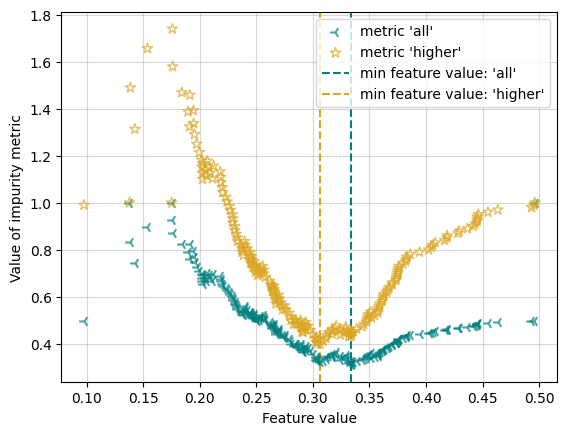

In [39]:
def plot_impurty_metrics(set_df: pd.DataFrame, feat_idx: int, use_weighting: bool = False):

    val_imp_metr_all = []
    val_imp_metr_high = []
    feature_val = []

    for fval in set_df.feature:
        val_imp_metr_all.append(impurty_metrics_all_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        val_imp_metr_high.append(impurty_metrics_higher_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        feature_val.append(fval)

    index_y_val_all = val_imp_metr_all.index(min(val_imp_metr_all))
    index_y_val_high = val_imp_metr_high.index(min(val_imp_metr_high))

    x_min_value_all = feature_val[index_y_val_all]
    x_min_value_high = feature_val[index_y_val_high]

    plt.scatter(feature_val, val_imp_metr_all, alpha=0.7, label='metric \'all\'', marker='3', color='teal', zorder=3, s=60)
    plt.scatter(feature_val, val_imp_metr_high, alpha=0.7, label='metric \'higher\'', marker='*', facecolor='None', edgecolor='goldenrod', zorder=3, s=60)
    plt.axvline(x=x_min_value_all, linestyle='dashed', label='min feature value: \'all\'', color='teal')
    plt.axvline(x=x_min_value_high, linestyle='dashed', label='min feature value: \'higher\'', color='goldenrod')
    plt.xlabel('Feature value')
    plt.ylabel('Value of impurity metric')
    plt.grid(alpha=0.5, zorder=1)
    plt.legend()
    plt.show()

plot_impurty_metrics(set_df, 0)    

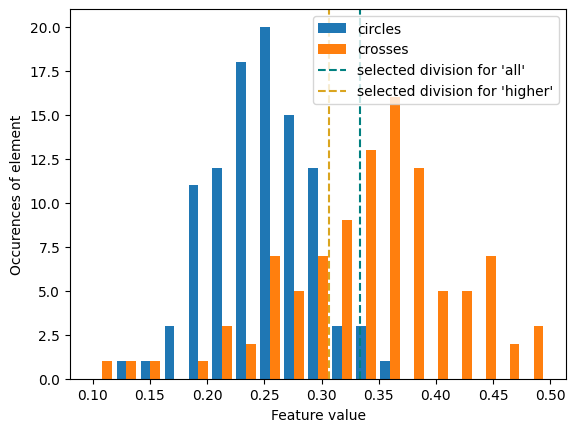

In [50]:
def calc_min_value(set_df: pd.DataFrame, feat_idx: int, use_weighting: bool = False):

    val_imp_metr_all = []
    val_imp_metr_high = []
    feature_val = []

    for fval in set_df.feature:
        val_imp_metr_all.append(impurty_metrics_all_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        val_imp_metr_high.append(impurty_metrics_higher_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        feature_val.append(fval)

    index_y_val_all = val_imp_metr_all.index(min(val_imp_metr_all))
    index_y_val_high = val_imp_metr_high.index(min(val_imp_metr_high))

    x_min_value_all = feature_val[index_y_val_all]
    x_min_value_high = feature_val[index_y_val_high]

    plt.hist([set_df[set_df.label == 0].feature, set_df[set_df.label == 1].feature], bins=19, label=['circles', 'crosses'])
    plt.xlabel('Feature value')
    plt.ylabel('Occurences of element')
    plt.axvline(x=x_min_value_all, color='teal', linestyle='dashed', label='selected division for \'all\'')
    plt.axvline(x=x_min_value_high, color='goldenrod', linestyle='dashed', label='selected division for \'higher\'')
    plt.legend(loc='upper right')
    plt.show()

calc_min_value(set_df, 0)    

C:\Users\Hanna Wędrychowicz\AppData\Local\Temp\ipykernel_2168\3189251174.py:19: UserWarning: You passed a edgecolor/edgecolors ('tab:orange') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=set_df[set_df.label == 1].feature, y=set_df[set_df.label == 1].label, label='crosses', marker='+', edgecolor='tab:orange', zorder=3)


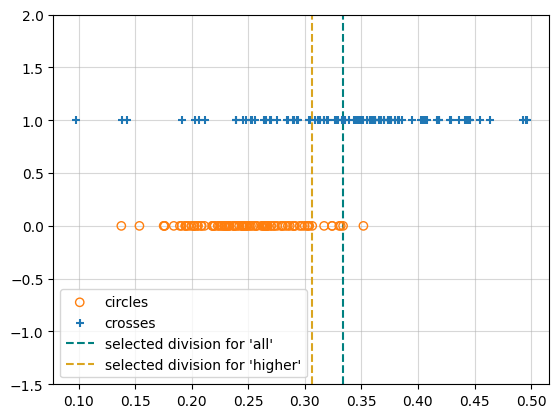

In [51]:
def plot_stars_min_value(set_df: pd.DataFrame, feat_idx: int, use_weighting: bool = False):

    val_imp_metr_all = []
    val_imp_metr_high = []
    feature_val = []

    for fval in set_df.feature:
        val_imp_metr_all.append(impurty_metrics_all_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        val_imp_metr_high.append(impurty_metrics_higher_in_denominator(set_df, feat_idx=feat_idx, div_point=fval, use_weighting=use_weighting))
        feature_val.append(fval)

    index_y_val_all = val_imp_metr_all.index(min(val_imp_metr_all))
    index_y_val_high = val_imp_metr_high.index(min(val_imp_metr_high))

    x_min_value_all = feature_val[index_y_val_all]
    x_min_value_high = feature_val[index_y_val_high]

    plt.scatter(x=set_df[set_df.label == 0].feature, y=set_df[set_df.label == 0].label, label='circles', marker= 'o', facecolor="None", edgecolor='tab:orange', zorder=3)
    plt.scatter(x=set_df[set_df.label == 1].feature, y=set_df[set_df.label == 1].label, label='crosses', marker='+', edgecolor='tab:orange', zorder=3)
    plt.axvline(x=x_min_value_all, color='teal', linestyle='dashed', label='selected division for \'all\'')
    plt.axvline(x=x_min_value_high, color='goldenrod', linestyle='dashed', label='selected division for \'higher\'')
    plt.legend(loc="lower left")
    plt.grid(alpha=0.5, zorder=1)
    plt.ylim(-1.5, 2.0)

plot_stars_min_value(set_df, 0)


In [ ]:
ten_set = zrob_set
narysuj_wykres(ten_set)